## Meriskill Data Analysis Internship

### Title of the project 1: “Sales Data Analysis”
### Purpose: Analyze sales data to identify trends, top-selling products, and revenue metrics for business decision-making.
### Description: In this project, you will dive into a large sales dataset to extract valuable insights. You will explore sales trends over time, identify the best-selling products, calculate revenue metrics such as total sales and profit margins, and create visualizations to present your findings effectively. This project showcases your ability to manipulate and derive insights from large datasets, enabling you to make data-driven recommendations for optimizing sales strategies.

In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sales = 'Sales.csv'

dataset = pd.read_csv(sales)
dataset

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [194]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [195]:
dataset.shape

(185950, 11)

In [196]:
dataset.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [197]:
# ID = dataset.sort_values(by=["Order ID", "Product", "Order Date"], ascending=True)
# ID

In [198]:
# sort by order id product price each order date
product = dataset.sort_values(by=["Order ID", "Product", "Price Each", "Order Date"], ascending=True)
product

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
136793,0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,21
136794,1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,14
136795,2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,13
136796,3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,20
136797,4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,11
...,...,...,...,...,...,...,...,...,...,...,...
24984,25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco,20
24985,25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles,12
24986,25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle,6
24987,25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,Dallas,10


In [199]:
city = dataset.groupby(["City", "Product"])[["Sales"]].sum()
city.sort_values(by="Product", ascending = False).head(10)

,,Sales
City,Product,
Seattle,iPhone,382200.0
Los Angeles,iPhone,782600.0
Boston,iPhone,527100.0
Atlanta,iPhone,380800.0
New York City,iPhone,616700.0
Dallas,iPhone,363300.0
San Francisco,iPhone,1162700.0
Portland,iPhone,315000.0
Austin,iPhone,263900.0


In [200]:
# Separate the order date
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'])

# extract the day, month, year, time components
dataset['day'] = dataset['Order Date'].dt.day
dataset['month'] = dataset['Order Date'].dt.month
dataset['year'] = dataset['Order Date'].dt.year
dataset['time'] = dataset['Order Date'].dt.time

# show the modified data frame
print(dataset)

        Unnamed: 0  Order ID                 Product  Quantity Ordered  \
0                0    295665      Macbook Pro Laptop                 1   
1                1    295666      LG Washing Machine                 1   
2                2    295667    USB-C Charging Cable                 1   
3                3    295668        27in FHD Monitor                 1   
4                4    295669    USB-C Charging Cable                 1   
...            ...       ...                     ...               ...   
185945       13617    222905  AAA Batteries (4-pack)                 1   
185946       13618    222906        27in FHD Monitor                 1   
185947       13619    222907    USB-C Charging Cable                 1   
185948       13620    222908    USB-C Charging Cable                 1   
185949       13621    222909  AAA Batteries (4-pack)                 1   

        Price Each          Order Date  \
0          1700.00 2019-12-30 00:01:00   
1           600.00 2019-12-

In [201]:
# Separate the purchase address
p = dataset["Purchase Address"].str.split(',', expand=True)
p.columns = ['Street', 'City', "State"]
p

,Street,City,State
0,136 Church St,New York City,NY 10001
1,562 2nd St,New York City,NY 10001
2,277 Main St,New York City,NY 10001
3,410 6th St,San Francisco,CA 94016
4,43 Hill St,Atlanta,GA 30301
...,...,...,...
185945,795 Pine St,Boston,MA 02215
185946,495 North St,New York City,NY 10001
185947,319 Ridge St,San Francisco,CA 94016
185948,916 Main St,San Francisco,CA 94016


In [215]:
# merge order date + purchase address + dataset
dataset['Street'] = p.Street
dataset['City'] = p.City
dataset['State'] = p.State
dataset

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,day,month,year,time,Street,State
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,30,12,2019,00:01:00,136 Church St,NY 10001
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,29,12,2019,07:03:00,562 2nd St,NY 10001
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,12,12,2019,18:21:00,277 Main St,NY 10001
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,22,12,2019,15:13:00,410 6th St,CA 94016
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,18,12,2019,12:38:00,43 Hill St,GA 30301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19,7,6,2019,19:02:00,795 Pine St,MA 02215
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19,1,6,2019,19:29:00,495 North St,NY 10001
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18,22,6,2019,18:57:00,319 Ridge St,CA 94016
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18,26,6,2019,18:35:00,916 Main St,CA 94016


### EDA

In [203]:
# How many products for each product type? Quantity ordered? Sale price?
dataset[["Product", "Quantity Ordered", 'Price Each', "Sales"]].value_counts(ascending=True)

Product                     Quantity Ordered  Price Each  Sales  
Apple Airpods Headphones    3                 150.00      450.00         1
USB-C Charging Cable        6                 11.95       71.70          1
                            5                 11.95       59.75          1
Bose SoundSport Headphones  3                 99.99       299.97         2
AA Batteries (4-pack)       7                 3.84        26.88          2
ThinkPad Laptop             2                 999.99      1999.98        2
AAA Batteries (4-pack)      9                 2.99        26.91          3
Vareebadd Phone             2                 400.00      800.00         3
Macbook Pro Laptop          2                 1700.00     3400.00        4
AAA Batteries (4-pack)      8                 2.99        23.92          5
Google Phone                2                 600.00      1200.00        7
Lightning Charging Cable    4                 14.95       59.80          7
iPhone                      2     

In [204]:
# How many products for each product type? Quantity ordered? Sale price?
dataset[["Product", "Quantity Ordered", 'Price Each', "Sales"]].value_counts()

Product                     Quantity Ordered  Price Each  Sales  
Lightning Charging Cable    1                 14.95       14.95      20210
USB-C Charging Cable        1                 11.95       11.95      20019
Wired Headphones            1                 11.99       11.99      17361
Apple Airpods Headphones    1                 150.00      150.00     15438
AA Batteries (4-pack)       1                 3.84        3.84       15333
AAA Batteries (4-pack)      1                 2.99        2.99       13726
Bose SoundSport Headphones  1                 99.99       99.99      13195
27in FHD Monitor            1                 149.99      149.99      7464
iPhone                      1                 700.00      700.00      6835
27in 4K Gaming Monitor      1                 389.99      389.99      6216
34in Ultrawide Monitor      1                 379.99      379.99      6163
Google Phone                1                 600.00      600.00      5518
Flatscreen TV               1     

Text(0.5, 1.0, 'Number of Products')

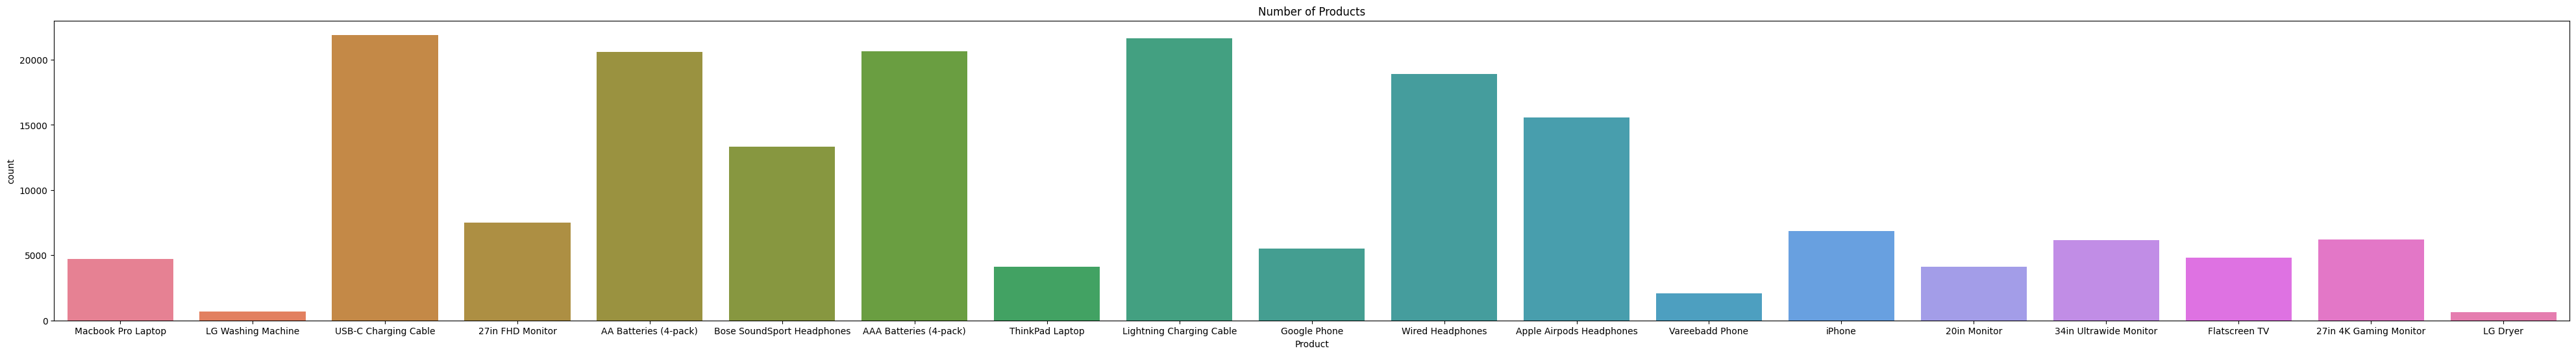

In [205]:
plt.figure(figsize=(50, 6))
sns.countplot(dataset, x="Product", hue="Product", legend="auto")
plt.title("Number of Products")


Text(0.5, 1.0, 'Number of Products with the number of Quantity Ordered')

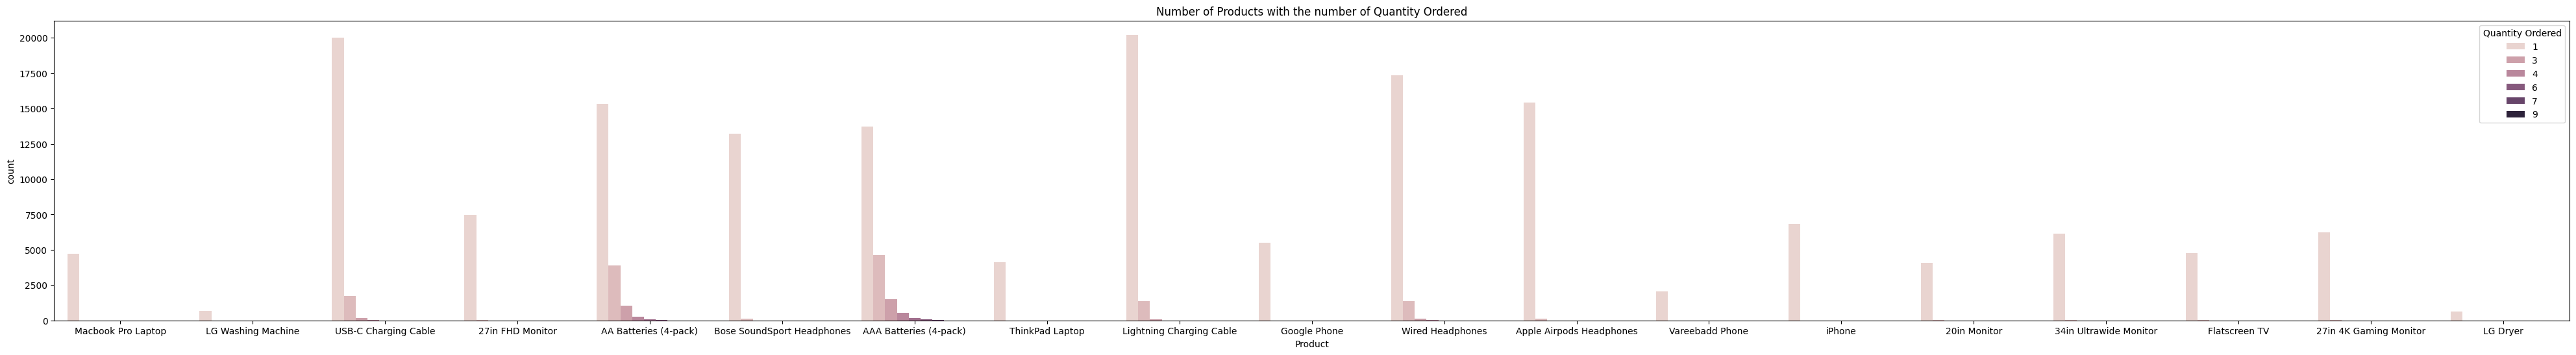

In [206]:
plt.figure(figsize=(50, 6))
sns.countplot(dataset, x="Product", hue="Quantity Ordered", legend="auto")
plt.title("Number of Products with the number of Quantity Ordered")

Text(0.5, 1.0, 'Number of Products with the number of Quantity Ordered')

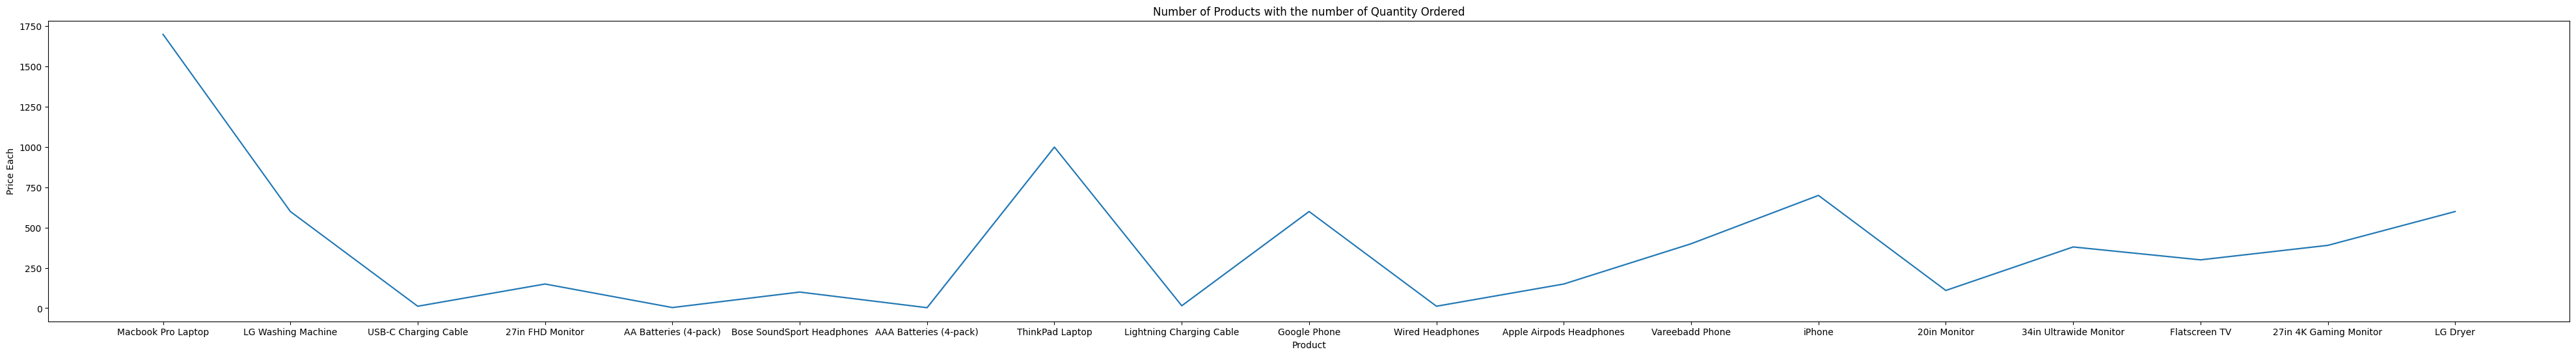

In [207]:
plt.figure(figsize=(50, 6))
sns.lineplot(data=dataset, x="Product", y="Price Each")
plt.title("Number of Products with the number of Quantity Ordered")

In [225]:
data = dataset[["Product"]].value_counts()
data

Product                   
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

Text(0.5, 1.0, 'Different Attack Methods by Terrorist Groups')

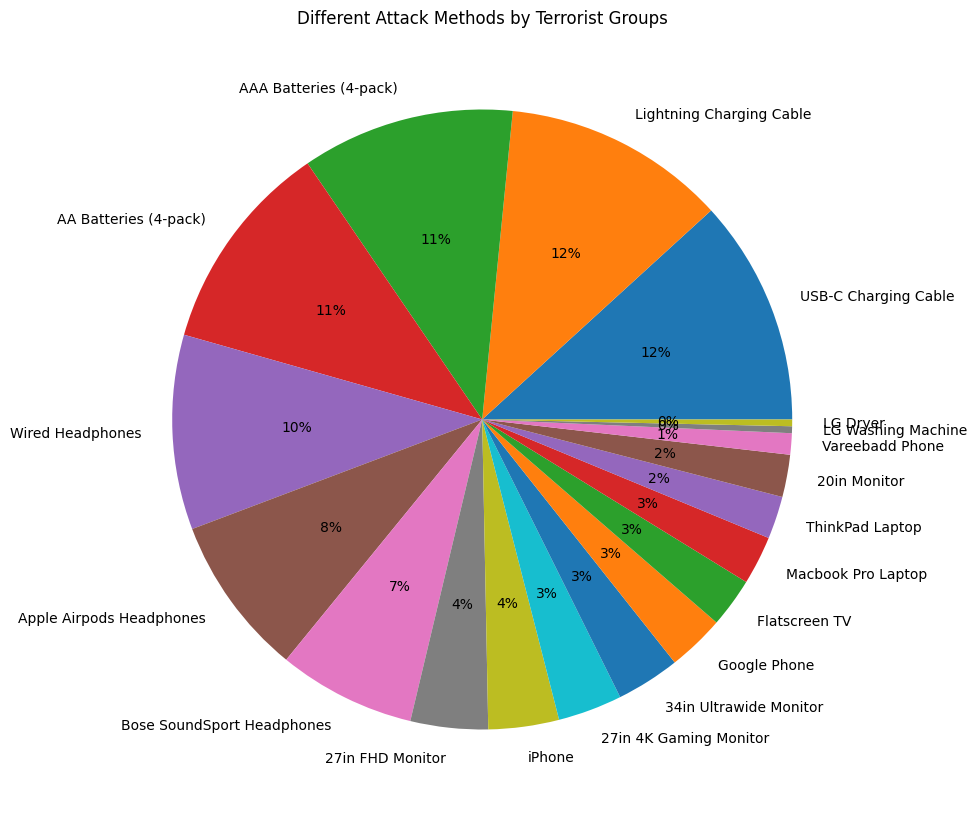

In [228]:
# Top 10 products bought
data = dataset[["Product"]].value_counts()
labels = ["USB-C Charging Cable", 'Lightning Charging Cable', "AAA Batteries (4-pack)", "AA Batteries (4-pack)", 
          "Wired Headphones", "Apple Airpods Headphones", 'Bose SoundSport Headphones', '27in FHD Monitor', 'iPhone',
          '27in 4K Gaming Monitor', '34in Ultrawide Monitor', 'Google Phone', 'Flatscreen TV', 'Macbook Pro Laptop',
          'ThinkPad Laptop', '20in Monitor', 'Vareebadd Phone', 'LG Washing Machine', 'LG Dryer'
        ]
plt.figure(figsize=(10, 20))
plt.pie(data, labels=labels, autopct='%.0f%%')
plt.title("Products")

In [209]:
# Top 10 least bought products

In [210]:
Attack_group = dataset.attacktype1_txt.value_counts()
plt.figure(figsize=(10, 20))
plt.pie(Attack_group, autopct='%1.0f%%', labels=Attack_group.index)
plt.title("Different Attack Methods by Terrorist Groups")

AttributeError: 'DataFrame' object has no attribute 'attacktype1_txt'

## Heat Map

In [ ]:
# heat map
sns.heatmap(dataset[['year', 'day', 'month', 'number of kills', 'number of Wounds']].corr(), annot=True)
plt.title("HeatMap")

In [ ]:
sns.heatmap(datasets.corr(), annot=True, cmap='GnBu_r')
plt.title("Correlation between the length and width of each species")
plt.show()